In [9]:
import setGPU

import tensorflow as tf

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import os
from random import shuffle

In [2]:
test_data_path = '../data/sci_tvt/test'
model_path = '../model/class_model.h5'

In [3]:
model = tf.keras.models.load_model(model_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
def get_single_channel_image(file_path):
    img = cv.imread(file_path)
    b, g, r = cv.split(img)
    return b

(192, 192, 3)
(1, 192, 192, 3)


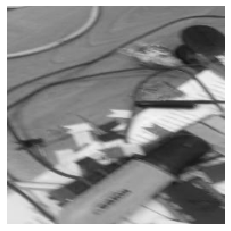

In [5]:
""" test with a single image"""
file_path = '../data/sci_tvt/test/NO_VISIBILITY/GICSD_8_7_213_SC.png'
#file_path = '../data/sci_tvt/test/NO_VISIBILITY/GICSD_28_7_213_rot_100_brightness01_SC.png'
img = cv.imread(file_path)#get_single_channel_image(file_path)
print(img.shape)
ex_img = np.expand_dims(img, axis=0)
print(ex_img.shape)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [6]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [7]:
norm_img = ex_img*(1./255)
predictions = model.predict(norm_img)
print(type(predictions), predictions.astype(np.float))

<class 'numpy.ndarray'> [[0.000002 0.999878 0.000120]]


In [10]:
"""
https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8
"""
def label_img(name):
    if name == 'FULL_VISIBILITY': return np.array([1, 0, 0])
    elif name == 'NO_VISIBILITY' : return np.array([0, 1, 0])
    elif name == 'PARTIAL_VISIBILITY': return np.array([0, 0, 1])

In [11]:
def load_test_data(path):
    test_data = []
    for clas in os.listdir(path):
        clas_path = os.path.join(path, clas)
        for file in os.listdir(clas_path):
            label = label_img(clas)
            
            file_path = os.path.join(clas_path, file)
            img = cv.imread(file_path)
            img = img*(1./255) #apply normalize that is applied in training
            test_data.append([np.array(img), label])
            
    shuffle(test_data)
    return test_data

In [12]:
test_data_path = '../data/sci_tvt/test'
test_data = load_test_data(test_data_path)
testImages = np.array([i[0] for i in test_data])
testLabels = np.array([i[1] for i in test_data])

In [13]:
predictions = model.predict(testImages)

In [17]:
print(testLabels.shape, predictions.shape)

(1517, 3) (1517, 3)


In [14]:
max_pred = np.argmax(predictions, axis=1)
max_gt = np.argmax(testLabels, axis=1)

In [18]:
print(max_pred.shape, max_gt.shape)

(1517,) (1517,)


In [15]:
cm_arr = confusion_matrix(max_gt, max_pred)
print(cm_arr)

[[474   0  43]
 [  0 553   5]
 [ 84  13 345]]


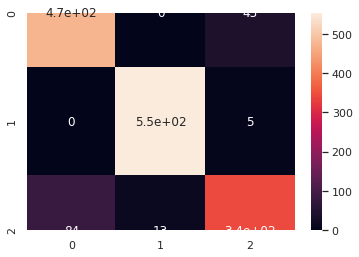

In [22]:
df_cm = pd.DataFrame(cm_arr, range(3), range(3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size

plt.show()

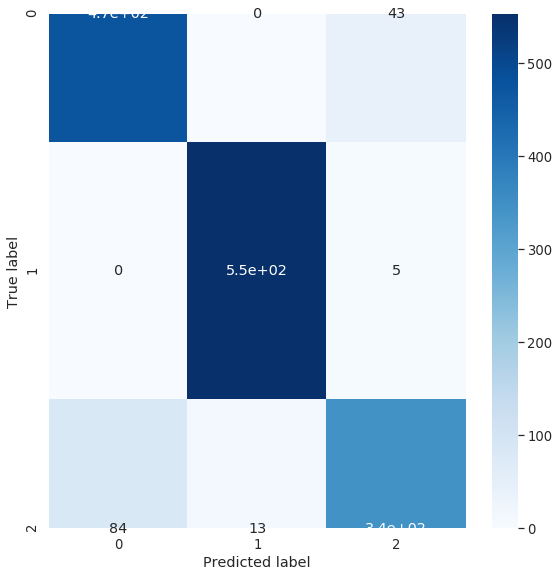

In [20]:
figure = plt.figure(figsize=(8, 8))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()